In [2]:
import tensorflow_datasets as tfds
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# # tfds works in both Eager and Graph modes
# tf.compat.v1.enable_eager_execution()

# # See available datasets
# print(tfds.list_builders())

# # Construct a tf.data.Dataset
# ds_train = tfds.load(name="nsynth", split="test", shuffle_files=True)

# # # Build your input pipeline
# # ds_train = ds_train.shuffle(1000).batch(128).prefetch(10)
# # for features in ds_train.take(1):
# #   image, label = features["image"], features["label"]

In [14]:
df = pd.read_csv("data.csv")
#if you want to limit the pitch of the dataframe
df2 = df[df["instrument_source_str"] == "acoustic"]

In [15]:
df2["instrument_family_str"].value_counts()

mallet      26857
string      19390
reed        13307
brass       12605
guitar      11380
keyboard     8068
flute        6362
vocal        3820
bass          200
organ         176
Name: instrument_family_str, dtype: int64

['vocal_acoustic_023-065-050',
 'vocal_acoustic_013-053-127',
 'vocal_acoustic_026-040-075',
 'vocal_acoustic_028-067-075',
 'vocal_acoustic_013-080-127',
 'vocal_acoustic_012-070-127',
 'vocal_acoustic_021-060-127',
 'vocal_acoustic_023-053-127',
 'vocal_acoustic_024-065-075',
 'vocal_acoustic_019-075-025',
 'vocal_acoustic_010-059-100',
 'vocal_acoustic_011-056-075',
 'vocal_acoustic_021-077-075',
 'vocal_acoustic_013-051-100',
 'vocal_acoustic_006-054-127',
 'vocal_acoustic_010-066-075',
 'vocal_acoustic_009-058-100',
 'vocal_acoustic_021-075-100',
 'vocal_acoustic_013-044-025',
 'vocal_acoustic_003-068-100',
 'vocal_acoustic_013-059-127',
 'vocal_acoustic_006-046-050',
 'vocal_acoustic_026-054-050',
 'vocal_acoustic_024-060-100',
 'vocal_acoustic_008-057-050',
 'vocal_acoustic_023-058-127',
 'vocal_acoustic_005-054-050',
 'vocal_acoustic_004-056-050',
 'vocal_acoustic_013-075-050',
 'vocal_acoustic_004-054-100']

option 1

In [64]:
df_guitar = df2[(df2["instrument_family_str"] == "guitar") & (df2["instrument_source_str"] == "acoustic")]
df_vocal = df2[(df2["instrument_family_str"] == "vocal") & (df2["instrument_source_str"] == "acoustic")]
df_brass = df2[(df2["instrument_family_str"] == "brass") & (df2["instrument_source_str"] == "acoustic")]
df_flute = df2[(df2["instrument_family_str"] == "flute") & (df2["instrument_source_str"] == "acoustic")]
df_bass = df2[(df2["instrument_family_str"] == "bass") & (df2["instrument_source_str"] == "synthetic")]
dfs = [df_guitar, df_vocal,  df_keys, df_string, df_bass, df_flute]

option 2

In [88]:
df_guitar = df2[(df2["instrument_family_str"] == "guitar")]
df_vocal = df2[(df2["instrument_family_str"] == "vocal")]
df_keys = df2[(df2["instrument_family_str"] == "synth_lead")]
df_string = df2[(df2["instrument_family_str"] == "string") ]
df_bass = df2[(df2["instrument_family_str"] == "bass")]
dfs = [df_guitar, df_vocal,  df_keys, df_string, df_bass]

In [62]:
corr, _ = pearsonr(df_vocal["reverb"], df_vocal["reverb"])
df_vocal

NameError: name 'pearsonr' is not defined

In [22]:
# df2 = df2.copy()
# cols = ["bright", "dark", "distortion", "fast_decay", "long_release", "multiphonic","nonlinear_env", "percussive", "reverb", "tempo-synced" ]
# g = pd.DataFrame(columns = cols)
# count = 0
# for r in df2["qualities"].values:
#     dic = {}
#     res = r.strip('][').split(', ')
#     for j in range(len(cols)):
#         dic[cols[j]] = int(res[j])
#     g = g.append(dic, ignore_index = "True")
#     count += 1
#     if (count%10000 == 0):
#         print(count/len(df))
# df_all_cols = pd.concat([df2, g], axis = 1)

In [23]:
# df_all_cols.to_csv("data.csv")

In [26]:
df3 = df[(df["instrument_family_str"]== "guitar") | (df["instrument_family_str"]== "keyboard")]

In [6]:
def display_corrs(df3):
    corrs = df3.corr()
    mask = np.zeros_like(corrs, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    f, ax = plt.subplots(figsize=(11, 9))

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(220, 10, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corrs, mask=mask, cmap=cmap, vmax=1, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": 0.5})
    plt.show()

# Plot correlation matrices for each instrument and show bar graph of qualities frequencies

----------------------------------------------------------------------
guitar


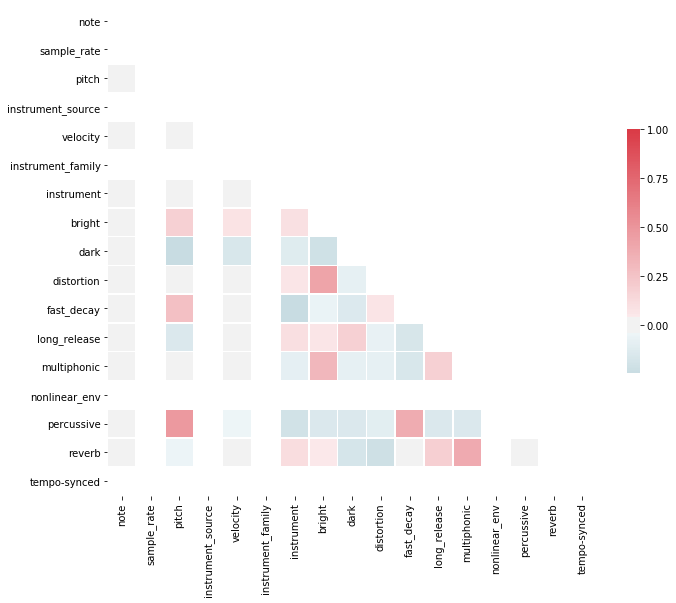

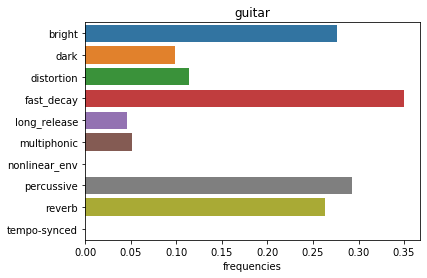

Dynamic Range: 87
max: 108
min: 21


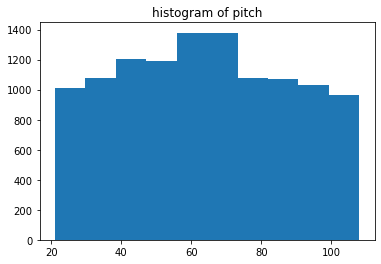

----------------------------------------------------------------------
vocal


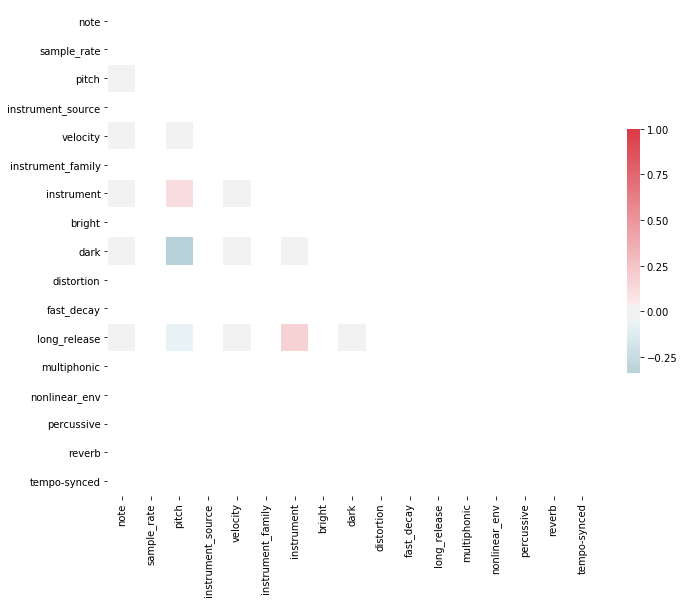

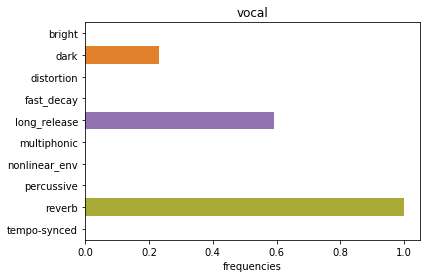

Dynamic Range: 44
max: 82
min: 38


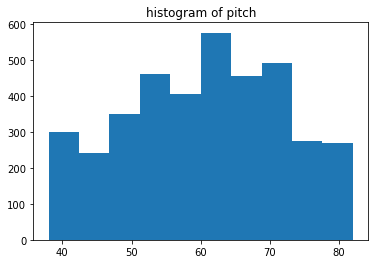

----------------------------------------------------------------------
brass


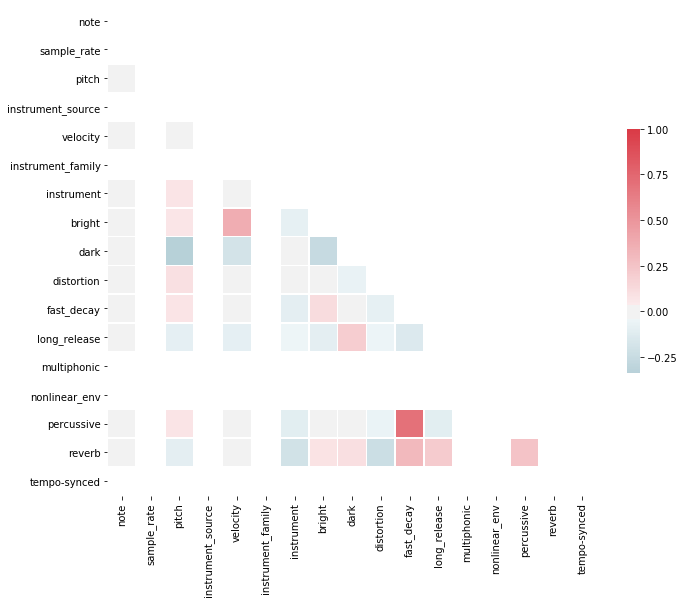

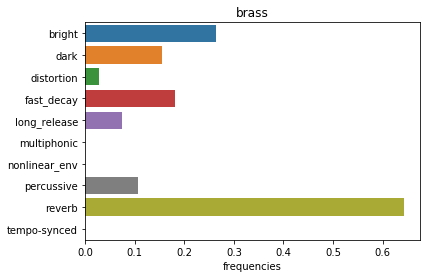

Dynamic Range: 75
max: 96
min: 21


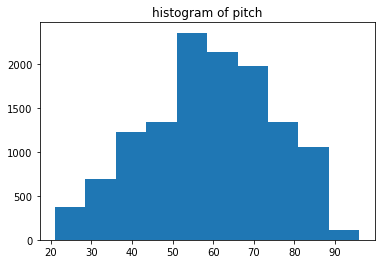

----------------------------------------------------------------------
string


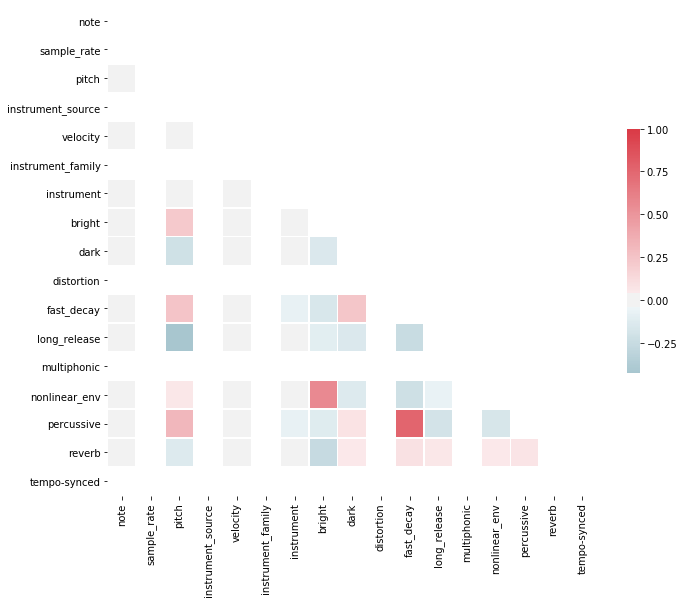

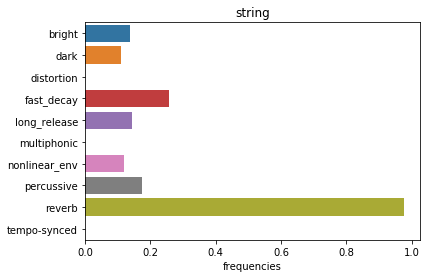

Dynamic Range: 82
max: 105
min: 23


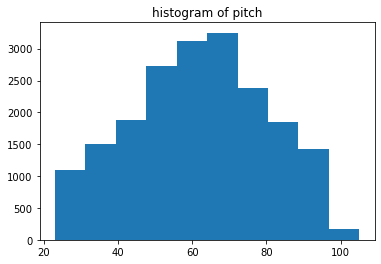

----------------------------------------------------------------------
bass


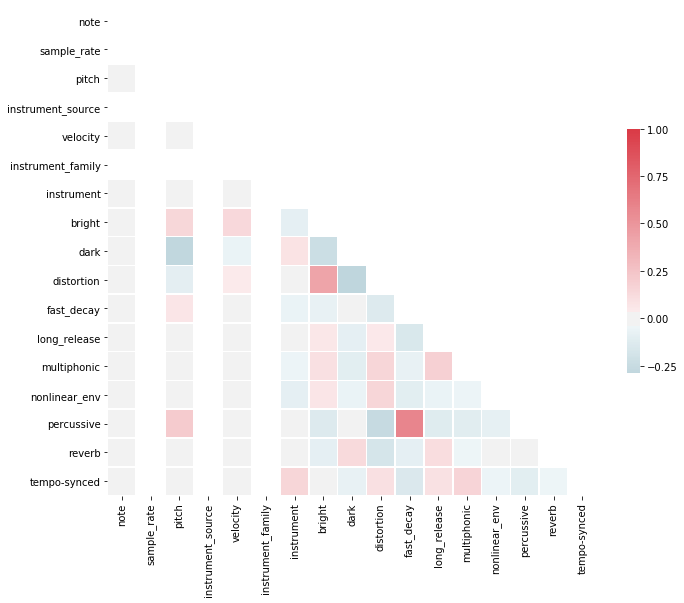

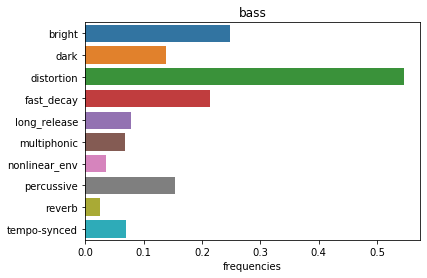

Dynamic Range: 100
max: 109
min: 9


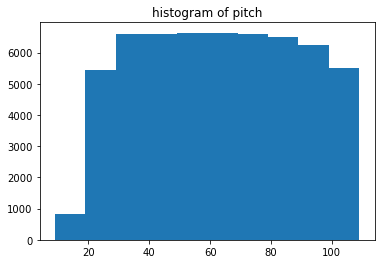

----------------------------------------------------------------------
flute


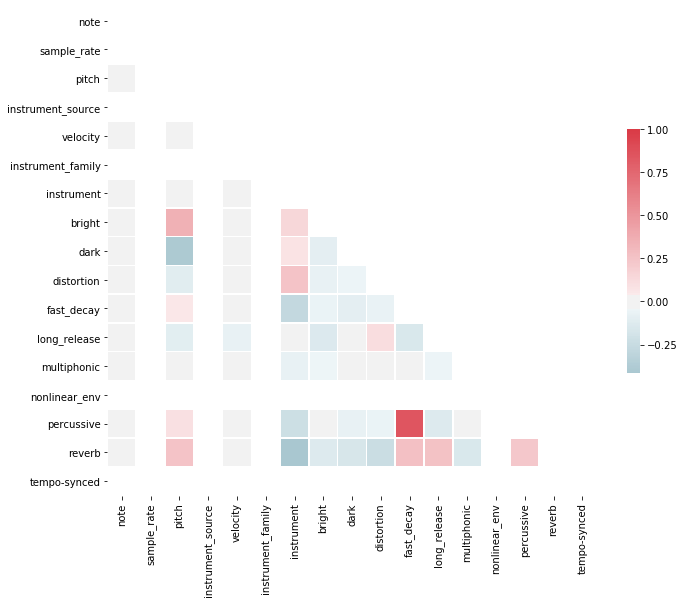

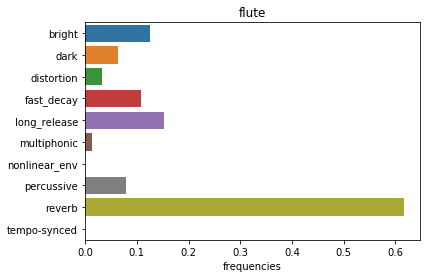

Dynamic Range: 87
max: 108
min: 21


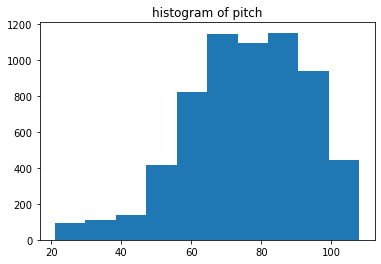

In [65]:
for df_ in dfs:
    print("----------------------------------------------------------------------")
    print(df_["instrument_family_str"].iloc[0])
    cols = ["bright", "dark", "distortion", "fast_decay", "long_release", "multiphonic","nonlinear_env", "percussive", "reverb", "tempo-synced" ]
    
    g = pd.DataFrame()

#     for r in df_["qualities"].values:
#         dic = {}
#         res = r.strip('][').split(', ')
#         for j in range(len(cols)):
#             dic[cols[j]] = int(res[j])
#         g = g.append(dic, ignore_index = "True")
    g = df_[cols].reset_index(drop = True)
    #display correlations
    display_corrs(df_)
    freqs = pd.DataFrame()
    for x in cols:
        freqs[x] = [g[x].sum()/float(len(df_))]
    freqs.index = ["frequencies"]
    freqs = freqs.transpose()
#     print(freqs.head())
    ax = sns.barplot(y = freqs.index, x = freqs["frequencies"], data = freqs)

    plt.title(df_["instrument_family_str"].iloc[0])
    plt.show()
    
    print("Dynamic Range:", df_["pitch"].max()- df_["pitch"].min())
    print("max:",df_["pitch"].max())
    print("min:", df_["pitch"].min())
    plt.hist(df_["pitch"])
    plt.title("histogram of pitch")
    plt.show()
    

(array([12605.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 19390.]),
 array([1. , 1.7, 2.4, 3.1, 3.8, 4.5, 5.2, 5.9, 6.6, 7.3, 8. ]),
 <a list of 10 Patch objects>)

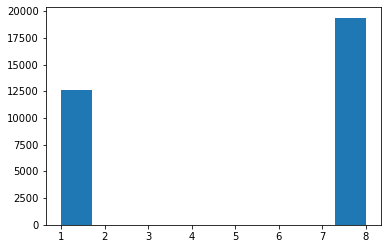

In [25]:
df_brass_strings = df_string.append(df_brass)
plt.hist(df_brass_strings["instrument_family"])

In [48]:
final_df = df_brass_strings.drop(columns = ["instrument_source_str", "Unnamed: 0.1", "sample_rate", "qualities", "instrument_family_str", "instrument_str", "note_str", "qualities_str", "note", "instrument_source", "instrument"]).reset_index(drop= True)
final_df["velocity"] = final_df["velocity"]/127.0
final_df["pitch"] = final_df["pitch"]/105.0

In [49]:
train, validate, test = np.split(final_df.sample(frac=1), [int(.6*len(final_df)), int(.8*len(final_df))])

In [57]:
train.to_csv("brass_strings_train.csv")
validate.to_csv("brass_strings_validate.csv")
test.to_csv("brass_strings_test.csv")

In [60]:
len(train)

19197

In [69]:
len(df_bass)
len(df_flute)

6362

In [70]:
df_bass = df2[(df2["instrument_family_str"] == "bass") & (df2["instrument_source_str"] == "electric")]
df_organ =df2[(df2["instrument_family_str"] == "bass") & (df2["instrument_source_str"] == "electric")]